# Проект интернет-магазин компьютерных игр «Стримчик»

<b>Предоставленные данные:</b>
Данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные до 2016 года, за 2016 год могут быть неполными.

<b>Цель проекта:</b>
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий период.

<b>Шаги по проекту:</b>
- Изучаем предоставленные данные и готовим их для анализа
- Проводим анализ данных (сколько игр выпускалось в разные годы, как менялись продажи по платформам, лидеры роста и падения продаж, влияние отзывов на продажи, влияние жанров на продажи, портреты пользователей по регионам)
- Проверяем гипотезы по рейтингу платформ и жанров

### Шаг 1. Изучаем общую информацию

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats as st

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
len(df)-len(df.drop_duplicates())

0

In [ ]:
duplicate_rows = df[df.duplicated(['Name', "Platform", "Year_of_Release"])]
duplicate_rows

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Найдена пара дубликатов строк при одновременной проверке по имени, платформе и году выпуска. Найденное кол-во очень мало относительно всего объема выборки, объемы продаж по ним маленькие, не будем трогать.

<b>Вывод</b>
- Названия столбцов корректно отражают суть данных
- Некоторые столбцы имеют некорректный формат данных: Year_of_Release - float, а нужен int, User_Score - object, а нужен float
- Много пропусков данных, в ряде полей -  Critic_Score, User_Score, Rating - под 50% пропусков.
- Дубликатов строк нет

### Шаг 2. Готовим данные для анализа
- Приводим названия столбцов к нижнему регистру
- Преобразовываем данные в нужные типы с описанием почему
- Обрабатываем пропуски с объясненим почему заполнили пропуски определённым образом или почему не стали это делать; описываем причины, которые могли привести к пропускам; обращаем внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей (отдельно разбираем это значение и описываем, как его обработать
- Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец

#### Приводим названия столбцов к нижнему регистру

In [ ]:
df.columns = df.columns.str.lower()
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3316,Madden NFL 2000,N64,1999.0,Sports,0.58,0.02,0.00,0.00,NaN,NaN,NaN
11384,Invizimals: The Alliance,PSV,2013.0,Action,0.00,0.06,0.00,0.02,69.0,6.8,E10+
11210,Rock Band 3,DS,2010.0,Misc,0.07,0.01,0.00,0.01,79.0,5.5,E10+
1502,Turok: Evolution,PS2,2002.0,Shooter,0.64,0.50,0.00,0.17,61.0,7.3,M
2240,Disney Magical World,3DS,2013.0,Adventure,0.17,0.20,0.53,0.03,71.0,7.5,E
7611,NBA 07,PSP,2006.0,Sports,0.18,0.00,0.00,0.02,68.0,7,E
13541,Crushed Baseball,GBA,2004.0,Sports,0.03,0.01,0.00,0.00,NaN,tbd,E
7370,Imagine: Boutique Owner,DS,2009.0,Simulation,0.20,0.00,0.00,0.01,NaN,tbd,E
1738,Destruction Derby 2,PS,1996.0,Racing,0.65,0.44,0.00,0.08,NaN,NaN,NaN
10104,Transformer: Rise of the Dark Spark,PS3,2014.0,Action,0.04,0.04,0.01,0.02,NaN,NaN,NaN


#### Преобразуем тип данных данных в корректный
   - year_of_release - сейчас float (числа с плавающей точкой, такой формат не подходит для года), преобразуем в int (целые числа)
   - user_score - сейчас object (текстовые или смешанные числовые и нечисловые значения), такой формат лучше привести к числовому, чтобы проводить подсчеты, преобразуем в float. Столбец user_score содержит значение "tbd", аббревиатура для "to be determined", переводится как "будет определено". Для нас равнозначно NaN, на него и заменим, чтобы преобразовать данные всего столбца в числа.

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Обрабатываем пропуски и анализируем их причины.

In [ ]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

<b>Вывод:</b>
- Пропусков много: year_of_release, critic_score, user_score, rating
- Но заполнять их расчетными значениями некорректно для данных параметров и исказит последующие расчеты
- Возможные причины пропусков:
     - year_of_release - техническая ошибка, но кол-во очень маленькое, не исказит статистику
     - critic_score и  user_score - могли возникнуть из-за технической ошибки, человеческого фактора или просто потому, что данных нет - новая игра, игры не оценивались критиками или пользователями
     - rating - рейтинг от организации ESRB, рейтингование необязательное, производитель мог счесть необзательным получение рейтинга + ESRB рейтингует игры Северной Америки

#### Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<br> А можно использовать вот такой код:</font><br>
`= data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)`

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [ ]:
# Посмотрим, что осталось
temp = df.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во N

<b>Вывод:</b>
    
    

- Преобразовали тип данных столбцов year_of_release и user_score в корректный форрмат(попутно заменили значение "tbd" из user_score на NaM
- Проанализировали пропуски. Их много в year_of_release, critic_score, user_score, rating. Но заполнять их расчетными значениями некорректно для данных параметров и исказит последующие расчеты
- Проанализировали возможные причины пропусков:
     - year_of_release - техническая ошибка, но кол-во очень маленькое, не исказит статистику
     - critic_score и  user_score - могли возникнуть из-за технической ошибки, человеческого фактора или просто потому, что данных нет - новая игра, игры не оценивались критиками или пользователями     -
     - rating - рейтинг от организации ESRB, рейтингование необязательное, производитель мог счесть необзательным получение рейтинга + ESRB рейтингует игры Северной Америки

### Шаг 3. Проводим исследовательский анализ данных
- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [ ]:
df['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [ ]:
by_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
by_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


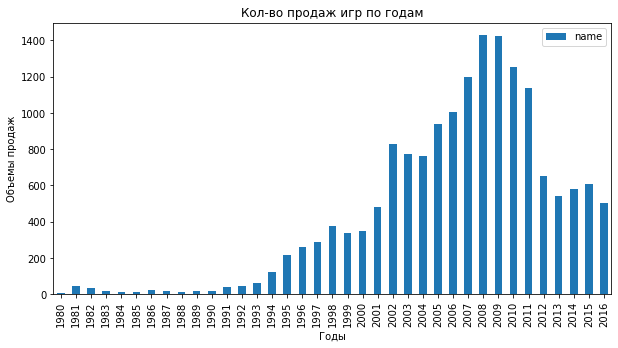

In [ ]:
by_year.plot.bar(figsize = (10,5))
plt.title('Кол-во продаж игр по годам')
plt.xlabel('Годы')
plt.ylabel('Объемы продаж')
plt.show()

<b>Вывод:</b> до 1994 мало игр, резкий скачок в 2002 году, пик 2008 - 2009, затем спад. Для общего анализа все данные важны, они показывают динамику процессов на рынке компьютерных игр. Но, т.к. мир быстро меняется для дальнейшего анализа возьму данные с 2002 года, когда произошел резкий рост кол-ва игр.

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
df_10years = df.query('year_of_release in [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]')
df_10years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [ ]:
df_10years.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1027.96
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
PSP,289.53
3DS,257.81
GBA,251.28


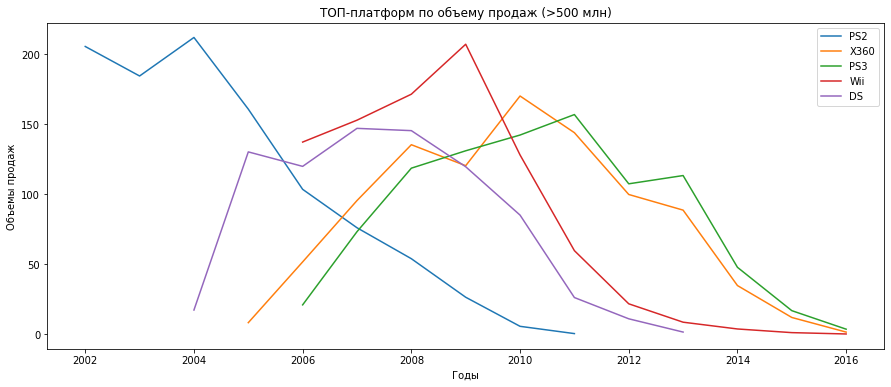

In [ ]:
plt.figure(figsize=(15,6))
plt.title('ТОП-платформ по объему продаж (>500 млн)')
plt.xlabel('Годы')
plt.ylabel('Объемы продаж')

for i in ["PS2", "X360", "PS3", "Wii", "DS"]:
    df_cut_plt = df_10years[(df_10years['platform'] == i)][['year_of_release','total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release').reset_index()
    sns.lineplot(x=df_cut_plt['year_of_release'], y=df_cut_plt['total_sales'], data = df_cut_plt, label=i)

In [ ]:
# Лучше создавать список для фильтрации не руками
temp = df_10years.copy()
list(temp.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[:6])

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4']

<b>Вывод:</b>
По ТОП-платформ по объему продаж (>500 млн) с 2002 года: срок жизни платформы ~ 10 лет. Максимум продаж приходится на 3-5 год.

In [ ]:
# Лучше определять не на глаз, а рассчитывать
temp = df.copy()
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона,
                                                            # поэтому +1
time_life['life'].median()

7.0

#### Какие платформы лидируют по продажам, растут или падают? Выбираем несколько потенциально прибыльных платформ.
Т.к. требуется сделать прогноз по успешности игр на 2017 год, ограничим выборку ретроспективой платформ, игры на которых запускались за последние 5 лет, т.к. мы знаем, что продолжительность жизни платформы 10 лет, а пик продаж приходится на 3-5 год жизни.

In [ ]:
df_5years = df.query('year_of_release in [2012, 2013, 2014, 2015, 2016]')
df_5years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [ ]:
df_5years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.9+ KB


In [ ]:
df_5years_pivot = df_5years.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
df_5years_pivot

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


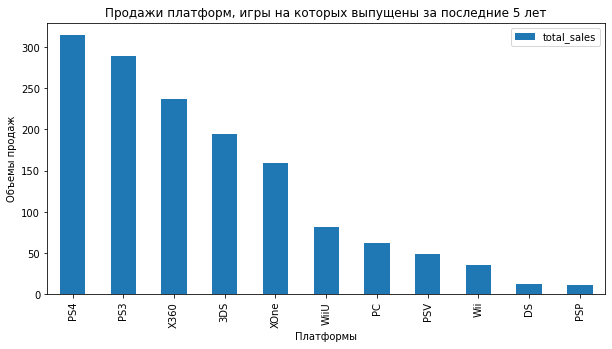

In [ ]:
df_5years_pivot.plot.bar(figsize = (10,5))
plt.title('Продажи платформ, игры на которых выпущены за последние 5 лет')
plt.xlabel('Платформы')
plt.ylabel('Объемы продаж')
plt.show()

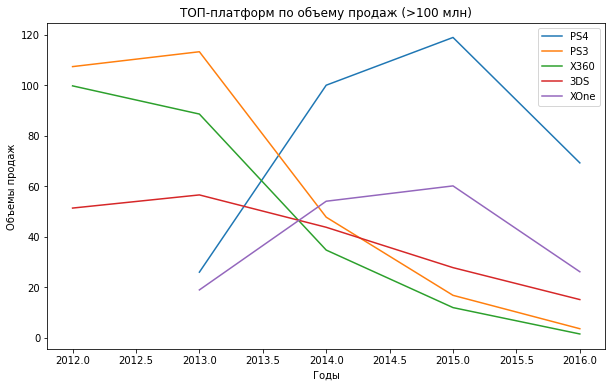

In [ ]:
plt.figure(figsize=(10,6))
plt.title('ТОП-платформ по объему продаж (>100 млн)')
plt.xlabel('Годы')
plt.ylabel('Объемы продаж')

for i in ["PS4", "PS3", "X360", "3DS", "XOne"]:
    df_cut_plt = df_5years[(df_5years['platform'] == i)][['year_of_release','total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release').reset_index()
    sns.lineplot(x=df_cut_plt['year_of_release'], y=df_cut_plt['total_sales'], data = df_cut_plt, label=i)

<b>Вывод:</b>
- ТОП-5 лидеровв продаж (> 100 млн) за 5 лет: PS4, PS3, X360, 3DS, XOne
- Продажи на всех платформах падают. Но мы помним, что жизненнный цикл платформы порядка 10 лет, поэтому на относительно новых платформах можно больше заработать (платформы PS4 и XOne)

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'Объемы продаж')

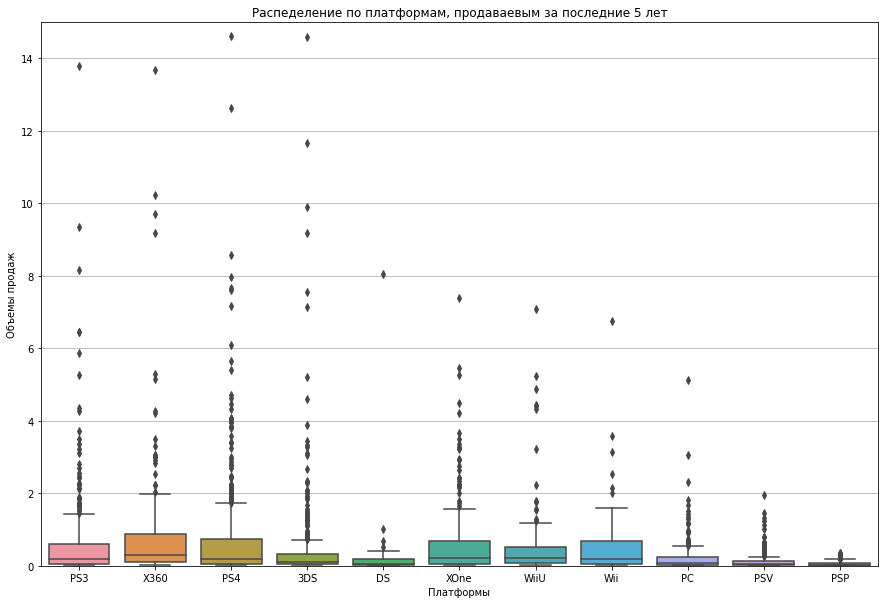

In [ ]:
#top5_platform = df_5years.query('platform in ["PS4", "PS3", "X360", "3DS", "XOne"]')[['platform', 'total_sales']]

plt.figure(figsize=(15,10))
plt.title('Распеделение по платформам, продаваевым за последние 5 лет')

plt.ylim(0,15)
plt.grid(True)

sns.boxplot(data=df_5years, x='platform', y='total_sales')
plt.xlabel('Платформы')
plt.ylabel('Объемы продаж')

Text(0, 0.5, 'Объемы продаж')

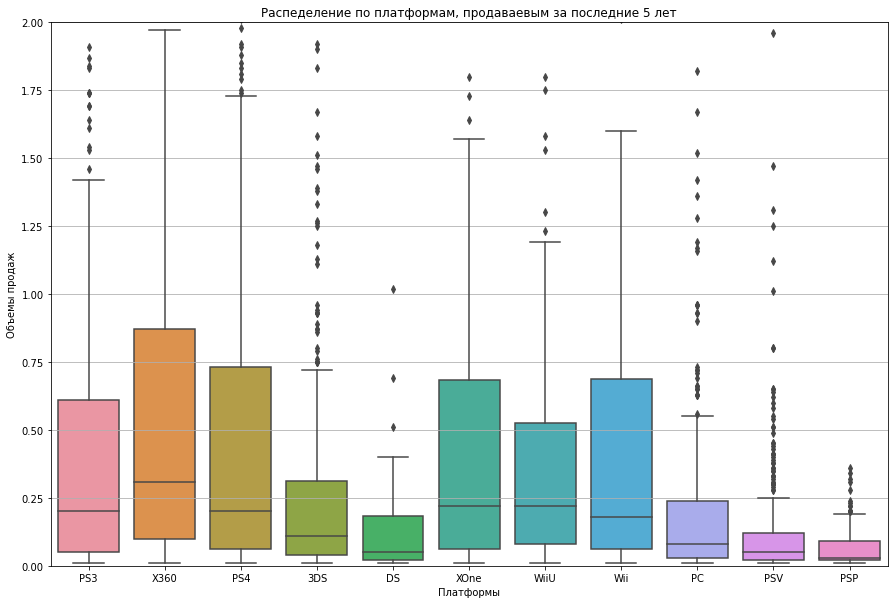

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Распеделение по платформам, продаваевым за последние 5 лет')
plt.ylim(0,2)
plt.grid(True)

sns.boxplot(data=df_5years, x='platform', y='total_sales')
plt.xlabel('Платформы')
plt.ylabel('Объемы продаж')

<b>Вывод:</b>
Размах у платформ разный, медианы разные, много выбросов. В данном случае расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно. image.png

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [ ]:
PS3 = df_5years.query('platform == "PS3"')[['total_sales','critic_score','user_score']]
PS3.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.331497,-0.005144
critic_score,0.331497,1.000000,0.539456
user_score,-0.005144,0.539456,1.000000


Text(0, 0.5, 'Объемы продаж')

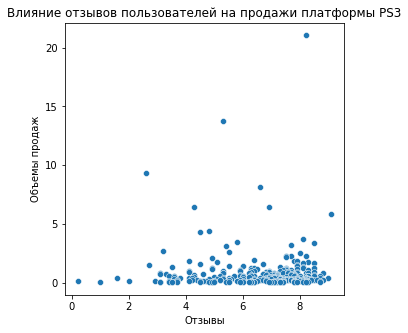

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='user_score', y='total_sales', data=PS3)
plt.title('Влияние отзывов пользователей на продажи платформы PS3')
plt.xlabel('Отзывы')
plt.ylabel('Объемы продаж')

Text(0, 0.5, 'Объемы продаж')

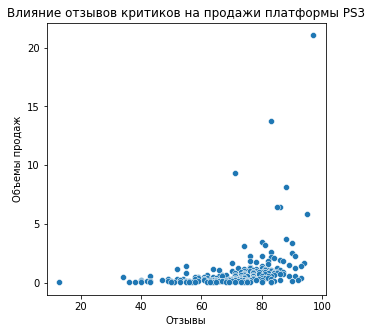

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='critic_score', y='total_sales', data=PS3)
plt.title('Влияние отзывов критиков на продажи платформы PS3')
plt.xlabel('Отзывы')
plt.ylabel('Объемы продаж')

<b>Вывод:</b>
Корреляция между оценками пользователей и продажами нет, значение корреляции близко к нулю.
Корреляция между оценками критиков и продажами небольшая есть, чем выше оценка критиков, тем больше продаж.

#### Соотнесем выводы с продажами игр на других платформах

In [ ]:
#df_5years.query('platform not in ["PS3"]')[['total_sales','critic_score','user_score']].corr()

- Корреляция по всем платформам

In [ ]:
df_5years[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.308197,0.004429
critic_score,0.308197,1.000000,0.517727
user_score,0.004429,0.517727,1.000000


Text(0, 0.5, 'Объемы продаж')

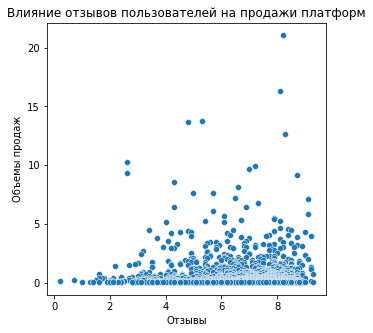

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='user_score', y='total_sales', data=df_5years)
plt.title('Влияние отзывов пользователей на продажи платформ')
plt.xlabel('Отзывы')
plt.ylabel('Объемы продаж')

Text(0, 0.5, 'Объемы продаж')

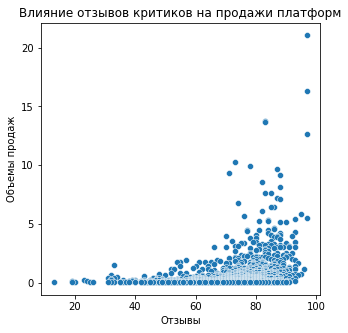

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='critic_score', y='total_sales', data=df_5years)
plt.title('Влияние отзывов критиков на продажи платформ')
plt.xlabel('Отзывы')
plt.ylabel('Объемы продаж')

- Корреляция по нескольким из популярных платформ

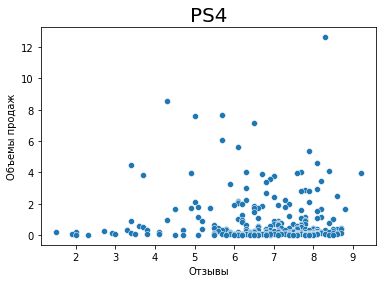

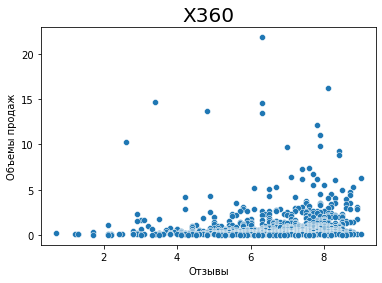

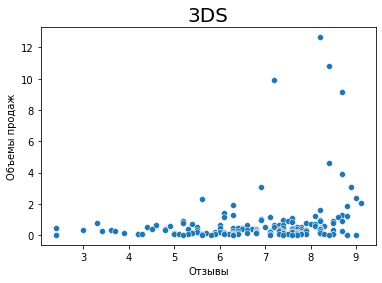

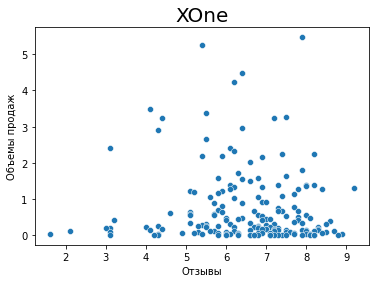

In [ ]:
df_5years_top_platforms = ['PS4','X360','3DS', 'XOne']

count = 0
for c in range(4):
    curr_platform = df_5years_top_platforms[count]
    df_prep = df[(df['platform'] == curr_platform) & (df['user_score'] > 0)].copy()
    df_filtered = df_prep[['total_sales' ,'user_score']]
    ax = sns.scatterplot(x='user_score', y='total_sales', data=df_filtered)
    ax.set_title(curr_platform, fontsize=20)
    count += 1
    plt.xlabel('Отзывы')
    plt.ylabel('Объемы продаж')
    plt.show()



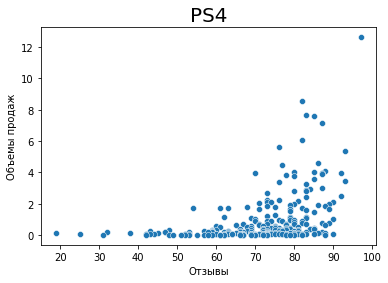

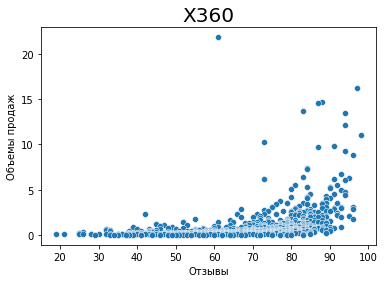

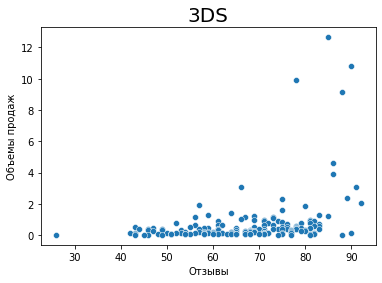

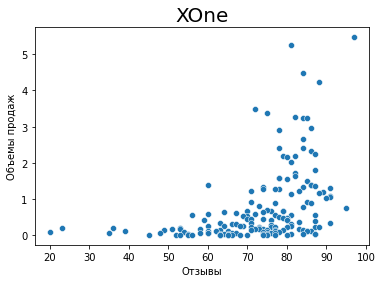

In [ ]:
df_5years_top_platforms = ['PS4','X360','3DS', 'XOne']

count = 0
for c in range(4):
    curr_platform = df_5years_top_platforms[count]
    df_prep = df[(df['platform'] == curr_platform) & (df['critic_score'] > 0)].copy()
    df_filtered = df_prep[['total_sales' ,'critic_score']]
    ax = sns.scatterplot(x='critic_score', y='total_sales', data=df_filtered)
    ax.set_title(curr_platform, fontsize=20)
    count += 1
    plt.xlabel('Отзывы')
    plt.ylabel('Объемы продаж')
    plt.show()

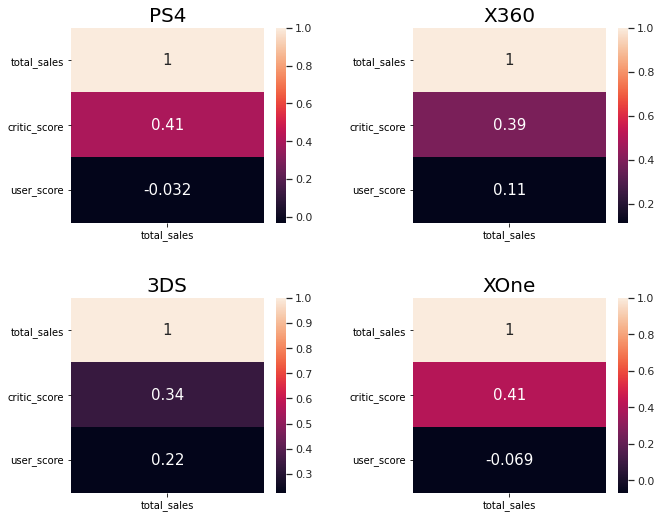

In [ ]:
df_5years_top_platforms = ['PS4','X360','3DS', 'XOne']

rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(10,8))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = df_5years_top_platforms[count]
        df_prep = df[(df['platform'] == curr_platform) & (df['user_score'] > 0)].copy()

        df_filtered = df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False),
                         annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Расчет по Платформе 3DS


user_score     0.197583
total_sales    1.000000
Name: total_sales, dtype: float64

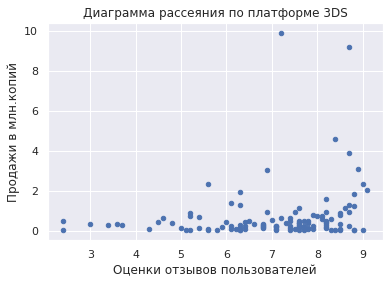

critic_score    0.320803
total_sales     1.000000
Name: total_sales, dtype: float64

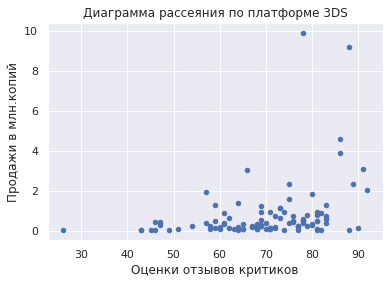

Расчет по Платформе DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PC


user_score    -0.121867
total_sales    1.000000
Name: total_sales, dtype: float64

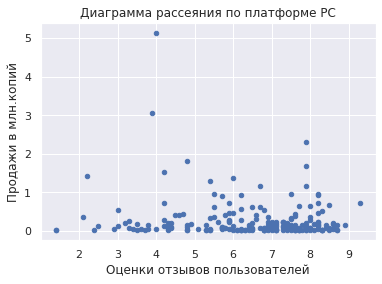

critic_score    0.237243
total_sales     1.000000
Name: total_sales, dtype: float64

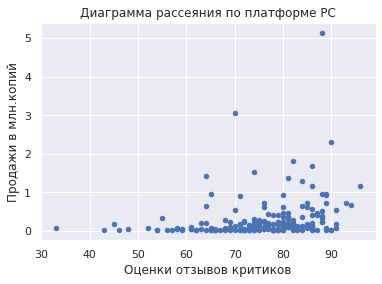

Расчет по Платформе PS3


user_score    -0.005144
total_sales    1.000000
Name: total_sales, dtype: float64

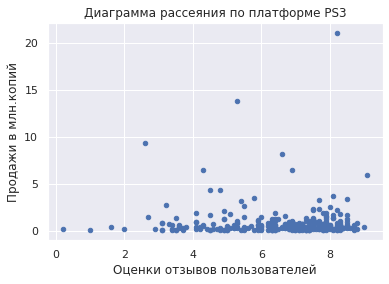

critic_score    0.331497
total_sales     1.000000
Name: total_sales, dtype: float64

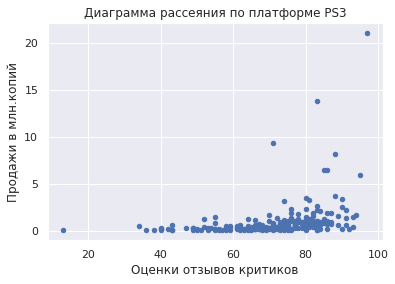

Расчет по Платформе PS4


user_score    -0.031957
total_sales    1.000000
Name: total_sales, dtype: float64

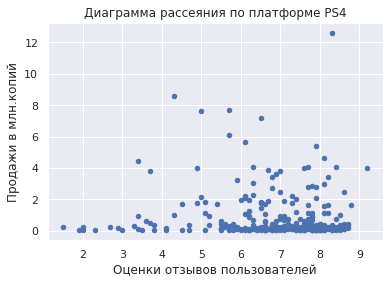

critic_score    0.406568
total_sales     1.000000
Name: total_sales, dtype: float64

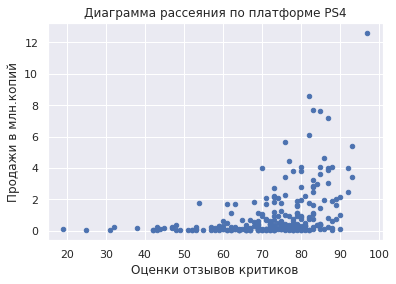

Расчет по Платформе PSP


user_score    -0.802302
total_sales    1.000000
Name: total_sales, dtype: float64

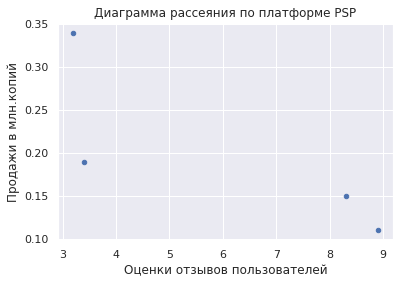

Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


user_score    -0.004339
total_sales    1.000000
Name: total_sales, dtype: float64

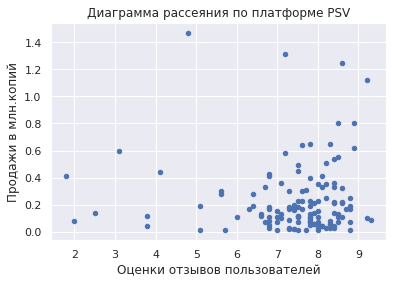

critic_score    0.094488
total_sales     1.000000
Name: total_sales, dtype: float64

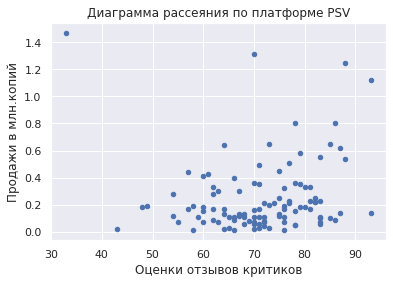

Расчет по Платформе Wii


user_score     0.296197
total_sales    1.000000
Name: total_sales, dtype: float64

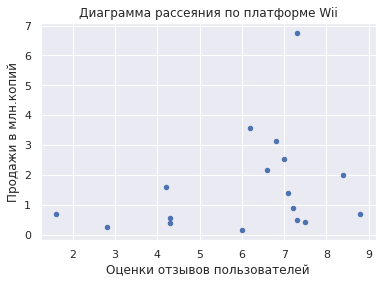

critic_score   -0.424341
total_sales     1.000000
Name: total_sales, dtype: float64

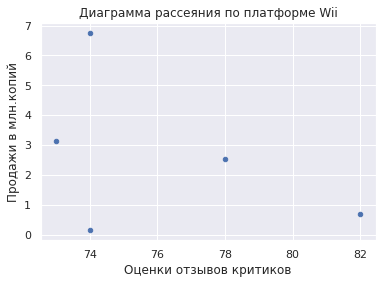

Расчет по Платформе WiiU


user_score     0.400219
total_sales    1.000000
Name: total_sales, dtype: float64

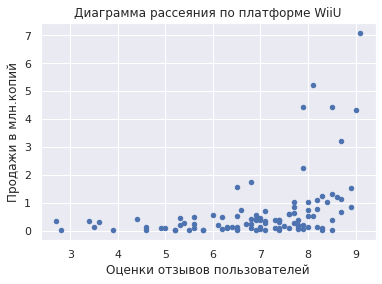

critic_score    0.34838
total_sales     1.00000
Name: total_sales, dtype: float64

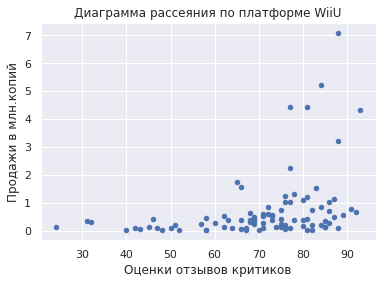

Расчет по Платформе X360


user_score     0.006164
total_sales    1.000000
Name: total_sales, dtype: float64

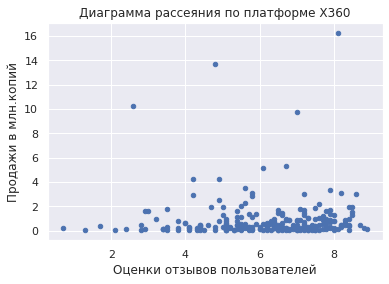

critic_score    0.360573
total_sales     1.000000
Name: total_sales, dtype: float64

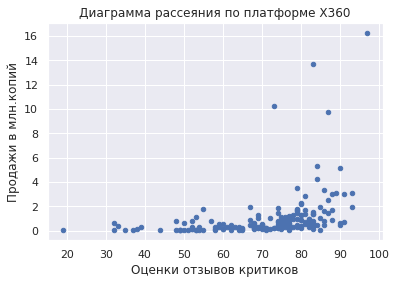

Расчет по Платформе XOne


user_score    -0.068925
total_sales    1.000000
Name: total_sales, dtype: float64

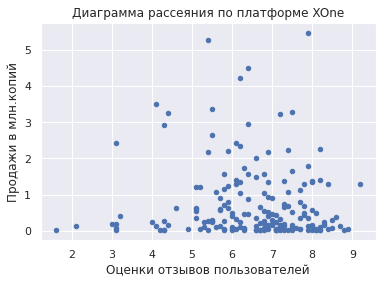

critic_score    0.416998
total_sales     1.000000
Name: total_sales, dtype: float64

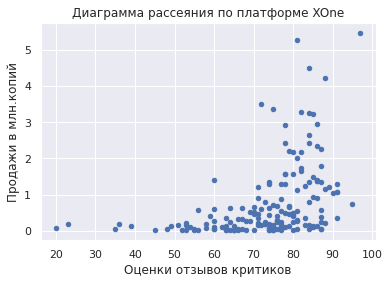

In [ ]:
# Можно весь анализ сделать водном цикле, примерно вот так:
import matplotlib.pyplot as plt
df_sc, y = df_5years.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[games_on_pl['user_score'].notna() == True])
    not_critic = len(games_on_pl[games_on_pl['critic_score'].notna() == True])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl.plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl.plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

<b>Вывод:</b> по нескольким популярным платформам корреляция примерно аналогичная: нет однозначной зависимости от оценок пользователей и есть небольшая зависимость от отзывов критиков.

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
genre_pivot = df_5years.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)
genre_pivot

,name
genre,
Action,1031
Role-Playing,370
Adventure,302
Sports,268
Shooter,235
Misc,192
Racing,115
Fighting,109
Platform,85


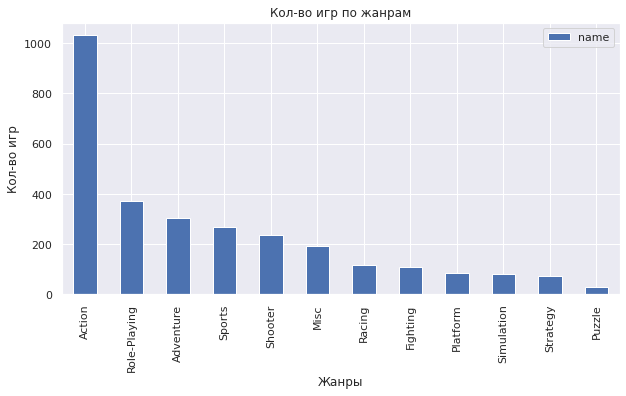

In [ ]:
genre_pivot.plot.bar(figsize = (10,5))
plt.title('Кол-во игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Кол-во игр')
plt.show()

In [ ]:
genre_pivot_2 = df_5years.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_pivot_2

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


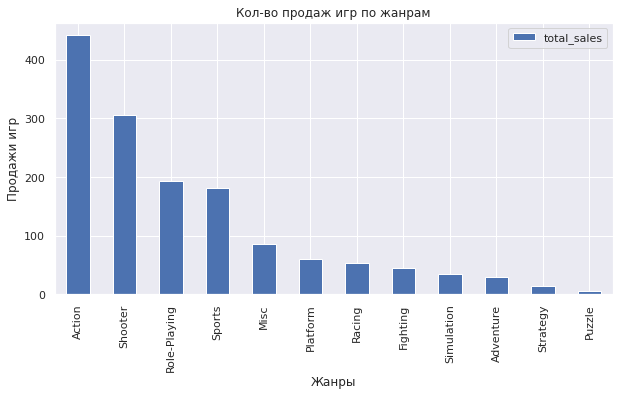

In [ ]:
genre_pivot_2.plot.bar(figsize = (10,5))
plt.title('Кол-во продаж игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи игр')
plt.grid(True)
plt.show()

In [ ]:
genre_pivot_3 = df_5years.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)
genre_pivot_3

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


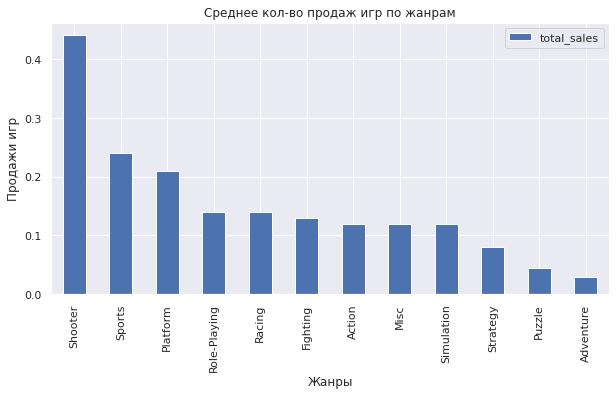

In [ ]:
genre_pivot_3.plot.bar(figsize = (10,5))
plt.title('Среднее кол-во продаж игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи игр')
plt.grid(True)
plt.show()

<b>Вывод:</b>
- Топ-3 по кол-ву выпущенных игр: Action, Role-Playing, Adventure
- Топ-3 по кол-ву продаж: Action, Shooter, Role-Playing  
- Топ-3 по медианным продажам: Shooter, Sports, Platform.
    
- Самый популярный жанр Action и по кол-ву выпущенных игр и по кол-ву продаж игр, но медианные продажи по нему лишь 7-ые в нашем списке.
- По медианному кол-ву продаж выделяются жанры Shooter, Sports, Platform, что может говорить о стабильности спроса на игры этих жанров.

### Шаг 4. Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

#### Определим для пользователя каждого региона (NA, EU, JP):
- cамые популярные платформы (топ-5)

In [ ]:
df_5years_pivot_platform = df_5years.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'],
                                          aggfunc = 'sum').apply(lambda x: x / x.sum(), axis=0) * 100

df_5years_pivot_platform.sort_values(by='eu_sales',ascending=False)

,eu_sales,jp_sales,na_sales
platform,,,
PS4,27.838286,8.287465,18.400257
PS3,21.084409,18.324852,17.493274
X360,14.703445,0.815246,23.698326
XOne,10.179156,0.176550,15.757145
3DS,8.413243,45.586250,9.359189
PC,7.450377,0.000000,3.235359
WiiU,4.958368,6.755634,6.447028
Wii,2.351920,1.760307,2.952773
PSV,2.241427,10.925330,1.857962


 <b>Вывод:</b>

- Регион NA ТОП-5: Х360 24%, PS4 18%, PS3 17%, XOne 16%, 3DS 9%. Лидер X360 занимает четверть рынка
- Регион EU ТОП-5: PS4 28% , PS3 21%, Х360 15%, XOne 10%, 3DS 8%. Лидер PS4 более четверти рынка
- Регион JP ТОП-5: 3DS 46%, PS3 18%, PSV 11%, PS4 8%, WiiU 5%. Лидер 3DS почти половина рынка

#### Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные жанры (топ-5)

In [ ]:
df_5years_pivot_genre = df_5years.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'],
                                          aggfunc = 'sum').apply(lambda x: x / x.sum(), axis=0) * 100

df_5years_pivot_genre.sort_values(by='jp_sales',ascending=False)

,eu_sales,jp_sales,na_sales
genre,,,
Role-Playing,9.575392,33.980683,10.829653
Action,31.439170,27.417177,30.092898
Misc,5.193165,6.677744,6.462257
Simulation,2.870842,5.405546,1.348630
Fighting,2.128961,4.901859,3.348732
Shooter,22.388619,4.792813,24.497013
Platform,4.224379,4.481255,4.294634
Adventure,1.866540,4.278741,1.509383
Sports,13.632059,4.159310,13.795963


<b>Вывод:</b>
- Регион NA ТОП-5: Action 30%, Shooter 25%, Sport 14%, Role-Playing 10%, Misc 6%. Лидер Action - треть продаж
- Регион EU ТОП-5: Action 31%, Shooter 22%, Sport 14%, Role-Playing 10%, Racing 5%. Лидер Action - треть продаж
- Регион JP ТОП-5: Role-Playing 34%, Action 27%, Misc 7%, Simulation 5%, Fighting 5%. Лидер Role-Playing - 34% продаж

Пристрастия пользователй Северной Америки и Европы совпадают, Япония сильно отличается.

#### Определим для пользователя каждого региона (NA, EU, JP):
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

Категории рейтинга:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+


In [ ]:
df_5years_pivot_rating = df_5years.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'],
                                          aggfunc = 'sum').apply(lambda x: x / x.sum(), axis=0) * 100

df_5years_pivot_rating.sort_values(by='jp_sales',ascending=False)

,eu_sales,jp_sales,na_sales
rating,,,
E,27.215159,33.830905,23.452815
T,12.751613,31.072367,13.538121
M,46.701339,25.316456,47.485953
E10+,13.331889,9.780272,15.523110


<b>Вывод:</b>
- В регионе NA самые популярные игры с рейтингом - M (47% продаж).
- В регионе EU амые популярные игры с рейтингом - M (47% продаж).
- В регионе JP амые популярные игры с рейтингом - E (34% продаж).

Пристрастия пользователй Северной Америки и Европы совпадают.  По Японии мы не можем сделать однозначный вывод, т.к. рейтинг ESRB категоризирует игры, выпущенные в Северной Америке, следовательно по играм, выпущенным в Японии у нас нет данных по рейтингу ESRB.




In [ ]:
temp = df_5years.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

1275 0.4417879417879418


M       498
T       412
E       395
E10+    306
Name: rating, dtype: int64

 <b>Вывод:</b>

В разрезе регионов:
    
- По платформам лидеры:
   - NA - X360 занимает четверть рынка
   - EU - PS4 более четверти рынка
   -JP  - 3DS почти половина рынка
- По жанрам лидеры:
   - NA - Action - треть продаж
   - EU - Action - треть продаж
   - JP Role-Playing - треть продаж
- По рейтингу ESRB:
   - NA - M - почти половина продаж
   - EU - M - почти половина продаж
   - JP - не стоит обращать внимание на рейтинг, т.к. он категоризирует игры Северной Америки


### Шаг 5. Проверяем гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

#### Проверяем гипотезы - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [ ]:
XOne = df_5years[(df_5years['platform'] == 'XOne') &  (df_5years['user_score'] > 0)]['user_score']
PC = df_5years[(df_5years['platform'] == 'PC') &  (df_5years['user_score'] > 0)]['user_score']
print(XOne.mean())
PC.mean()

6.521428571428572


6.4286407766990274

- Н0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Н1 - средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [ ]:
alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var=True)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


<b>Вывод:</b> можем утверждать, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Проверяем гипотезы - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [ ]:
Action = df_5years[(df_5years['genre'] == 'Action') &  (df_5years['user_score'] > 0)]['user_score']
Sports = df_5years[(df_5years['genre'] == 'Sports') &  (df_5years['user_score'] > 0)]['user_score']
print(Action.mean())
Sports.mean()

6.825047801147227


5.455897435897437

- Н0 - средние пользовательские рейтинги жанров Action и Sports одинаковые
- Н1 - средние пользовательские рейтинги жанров Action и Sports отличаются

In [ ]:
alpha = 0.05

results = st.ttest_ind(Action, Sports, equal_var=True)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


<b>Вывод:</b>  на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

<b>Вывод:</b>
    
    
- Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
   - Нулевая гипотеза всегда предполагает равенство средних исследуемых генеральных совокупностей. Поэтому за нулевую гипотезу принимаем, что средние пользовательские рейтинги платформ одинаковые. Соответсвенно, альтернативной гипотезой будет различие рейтингов платформ.
   - Гипотезу провеяем с помощью scipy.stats.ttest_ind, так как с его помощью можно сравнить средние двух совокупностей.
   - Принимаем значение alpha = 0.05 - критический уровень статистической значимости. Если p-value (веротяность) окажется меньше него - отвергнем нулевую гипотезу.
   - Получили p-value - 0.55. Следовательно, не можем отвергнуть нулевую гипотезу, значит средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Гипотеза 2 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
   - Нулевая гипотеза всегда предполагает равенство средних исследуемых генеральных совокупностей. Поэтому за нулевую гипотезу принимаем, что средние пользовательские рейтинги жанров одинаковые. Соответсвенно, альтернативной гипотезой будет различие рейтингов жанров.
   - Гипотезу провеяем с помощью scipy.stats.ttest_ind, так как с его помощью можно сравнить средние двух совокупностей.
   - Принимаем значение alpha = 0.05 - критический уровень статистической значимости. Если p-value (веротяность) окажется меньше него - отвергнем нулевую гипотезу.
   - Получили p-value - меньше 0.05. Следовательно, отвергаем нулевую гипотезу, значит средние пользовательские рейтинги жанров одинаковые.


### Шаг 6. Общий вывод

<b>Цель проекта:</b> Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий период.

<b>В ходе проета:</b>

1) Рассмотрели имеющиеся данные по продажам компьютерных игр, исходные данные качественные, понятные, но содержат большое количество незаполенных данных по оценкам рейтингам, за счет этого рекомендации по успешности игр в зависимости от этих параметров могут быть не совсем корректные

2) Определили, что релевантные под цели проекта данные из выборки - данные за последние 5 лет и на основе них сделали следующие

<b>Выводы</b>
- ТОП-5 лидеровв продаж (> 100 млн) за 5 лет: PS4, PS3, X360, 3DS, XOne
- Продажи на всех платформах падают. Но т.к. жизненнный цикл платформы порядка 10 лет, поэтому на относительно новых платформах можно больше заработать (платформы PS4 и XOne)
- Есть небольшая корреляция успешности продаж с отзывами критиков, при продвижении стоит обращать на этот параметр внимание, на отзывы пользователей лучше не ориентироваться, корреляции нет
- Топ-3 по кол-ву продаж жанры: Action, Shooter, Role-Playing. Самый популярный жанр Action и по кол-ву выпущенных игр и по кол-ву продаж игр, но медианные продажи по нему лишь 7-ые. По медианному кол-ву продаж выделяются жанры Shooter, Sports, Platform, что может говорить о стабильности спроса на игры этих жанров. Поэтому для рекламы лучше рассматривать игры этих жанров.   
При этом:
- Следует учитывать региональную специфику по играм востребованным пользователями:
     - Северная Америка и Еропа отдают предпочтения платформам Х360 и PS4, жанру Action и играм категории M
     - Японцы отдают предпочтения платформе 3DS, жанру Role-Playing, по категории корректных данных нет

3) Проверили гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтверждаем
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») - разные - подтверждаем